In [61]:
import json

with open('hackupc2023_restbai__dataset_sample.json', encoding='utf-8') as file:
    # Load the JSON data
    data = json.load(file)

Each property is represented by a number, and is associated to a dictionary that includes all the data in each house.

- `summary`: Title describing the property (written in Spanish).

- `city`: Municipality where the property is located.
- `neighborhood`: Neighborhood where the property is located.
- `region`: Region / Province where the property is located.
- `price`: Sold price (in Euros) of the property once was listed.
- `square_meters`: Living area of the property.
- `bedrooms`: Number of bedrooms of the property.
- `bathrooms`: Number of bathrooms on the property.
- `images`: Array of Internet-accessible URLs pointing to the property images.
  - Format is always like `https://restb-hackathon.s3.amazonaws.com/real_estate_dataset/images/{PROPERTY_ID}__{IMAGE_IDX}.jpg` where `PROPERTY_ID` is the same as the `key` of the dictionary and the `IMAGE_IDX` is going from `0` to `n - 1`.
- `num_images`: Number of images available of the property.
- `image_data`: Dictionary with the image insights that Restb.ai solutions could extract:
  - `image_data.r1r6`: Dictionary with the 4 different values of the R1R6 score (see PDF attached into the ZIP for more context).
    - `image_data.r1r6.property`: R1R6 score of the whole property.
    - `image_data.r1r6.kitchen`: R1R6 score of the kitchen sub-group of the property.
    - `image_data.r1r6.bathroom`: R1R6 score of the bathroom sub-group of the property.
    - `image_data.r1r6.interior`: R1R6 score of the interior sub-group of the property.
  - `image_data.style`: Dictionary with the Exterior Style of the property.
    - `image_data.style.label`: Label of the most confident prediction of the style of the property.
    - `image_data.style.confidence`: Float value (0 - 1) related with the confidence of the style of the property.
  - `image_data.features_by_room_type`: Dictionary with the Features found in the property split by Room types.
    - Each `key` of this dictionary is the Room Type label (i. e. `kitchen`).
    - Each value is a dictionary with the information found inside:
      - `image_data.features_by_room_type.RT.unique_features`: List of dictionaries with all the unique features from a list of +100 available options.
        - `image_data.features_by_room_type.RT.unique_features.label`: Label of the detection found in the `RT` room type (i. e. `refrigerator`).
        - `image_data.features_by_room_type.RT.unique_features.details`: Array of detailed labels related to the main detection (i. e. `stainless_steel`).
      - `image_data.features_by_room_type.RT.best_photo_idx`: Integer pointing to the index of the `images` array referring to the best photo of that room type of the property.
- `property_type`: Property type of the property.
  - Within the following 4 options: `single_family`, `condo_apartment`, `multi_family`, and `townhome`.
  
Image data is a dictionary as well. Therefore, we will have to treat it.  

Per cada propietat tenim l'score de les diverses habitacions i de la casa en general (pot haver-hi valors a nuls).

Tenim informació de l'estil i la confiança amb la qual es troba.


  

In [17]:
def extract_image_data_el(item, file):
    prop = file[item]
    image_data = prop["image_data"]
    # r1r6
    for el in ["property", "kitchen", "bathroom", "interior"]:
        prop["image_data.r1f6." + el] = image_data["r1r6"][el]

    # style
    for el in ["label", "confidence"]:
        prop["image_data.style" + el] = image_data["style"][el]
    
    
def extract_image_data(file):
    for item in file:
        extract_image_data_el(item, file)

In [18]:
extract_image_data(data)

In [19]:
import pandas as pd

df = pd.DataFrame.from_dict(data, orient="index")


In [20]:
df = df.drop("image_data", axis=1)

In [21]:
features_detected = ['baseboard_radiator', 'central_ac', 'dishwasher', 'double_oven', 'microwave', 'oven', 'radiator', 'range_hood', 'range_oven', 'separate_washer__dryer', 'stacked_washer__dryer', 'stovetop', 'refrigerator', 'tv', 'wall_mounted_ac', 'washer__dryer', 'water_heater', 'backsplash', 'bath', 'combined_bath_shower', 'double_sink', 'mirror', 'shower', 'sink', 'toilet', 'vanity', 'awning', 'balcony', 'basketball_court', 'bocce_ball', 'ceiling_fan', 'deck', 'dock', 'dog_park', 'dog_washing_station', 'fence', 'fire_pit', 'fireplace', 'fountain', 'french_doors', 'garden', 'gate', 'gazebo', 'hot_tub', 'lanai', 'lawn', 'mail_area', 'outdoor_bar', 'outdoor_kitchen', 'outdoor_living_space', 'outdoor_structure', 'package_area', 'patio', 'pergola', 'playground', 'pool', 'porch', 'putting_green', 'shuffleboard', 'soccer_field', 'solar_panels', 'storm_shelter', 'sunroom', 'tennis_court', 'trampoline', 'volleyball_court', 'aggregate_floor', 'brick_floor', 'carpet', 'concrete_floor', 'hardwood_floor', 'parquet_floor', 'tile_floor', 'beamed_ceiling', 'brick_ceiling', 'brick_wall', 'built_in_shelves', 'ceiling_fan', 'coffered_ceiling', 'concrete_ceiling', 'concrete_wall', 'crown_molding', 'drop_ceiling', 'elevator', 'fireplace', 'floor_ceiling_windows', 'french_doors', 'high_ceiling', 'log_wall', 'low_ceiling', 'natural_light', 'notable_chandelier', 'pool', 'skylight', 'stone_wall', 'textured_ceiling', 'tile_wall', 'track_lighting', 'tray_ceiling', 'vaulted_ceiling', 'wood_ceiling', 'wood_wall', 'backsplash', 'brown_cabinets', 'dark_brown_cabinets', 'light_brown_cabinets', 'white_cabinets', 'stone_countertops', 'countertops', 'kitchen_bar', 'kitchen_island', 'pendant_lighting','attached_carport', 'attached_garage', 'built_in_garage', 'detached_carport', 'detached_garage','beach_view', 'mountain_view', 'water_view']

In [68]:
df.head()

,summary,city,neighborhood,region,price,square_meters,bedrooms,bathrooms,images,num_images,...,kitchen_island,pendant_lighting,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view
303464,Dúplex en Les Arenes-Can Montllor-La Grípia,Les Arenes-Can Montllor-La Grípia,Distrito La Grípia-Sant Llorenç. Terrassa,valles_occidental_nord,155000,60,2,2,[https://restb-hackathon.s3.amazonaws.com/real...,1,...,0,0,0,0,0,0,0,0,0,0
323570,Casa adosada en Burgos,Universidad-Las Huelgas,Burgos Capital,alfoz_de_burgos,281000,272,4,2,[https://restb-hackathon.s3.amazonaws.com/real...,3,...,0,0,0,0,0,0,0,0,0,0
232546,Piso en El Playazo,El Playazo,Vera,levante_almeriense,134900,87,2,2,[https://restb-hackathon.s3.amazonaws.com/real...,1,...,0,0,0,0,0,0,0,0,0,0
261286,Piso en Mieres,Baíña-San Pedro-Siana,Mieres,asturias,35000,56,2,1,[https://restb-hackathon.s3.amazonaws.com/real...,22,...,0,0,0,0,0,0,0,0,0,0
800153,"Piso en Carrer del Bisbe Morgades, cerca de Ca...",Centre Històric,Vic,osona,395000,134,4,2,[https://restb-hackathon.s3.amazonaws.com/real...,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
for col in features_detected:
    df[col] = 0

for id_house, row in df.iterrows():
    j = data[id_house]['image_data']["features_by_room_type"]
    for k in j:
        for i in range (len(j[k]["unique_features"])):
            feature = j[k]["unique_features"][i]['label'];
            df.at[id_house, feature] = 1;

<ipython-input-22-641b8004a194>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
<ipython-input-22-641b8004a194>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
<ipython-input-22-641b8004a194>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
<ipython-input-22-641b

In [23]:
df["washer__dryer"].value_counts()

0    90
1    10
Name: washer__dryer, dtype: int64

City
Neighborhood
Region

Price

square_meters
bedrooms
bathrooms



In [24]:
df.to_csv("hackupc.csv")

## Tractar csv

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('hackupc.csv')

In [53]:
df.columns

Index(['property_id', 'summary', 'city', 'region', 'price', 'square_meters',
       'bedrooms', 'bathrooms', 'images', 'num_images',
       ...
       'pendant_lighting', 'attached_carport', 'attached_garage',
       'built_in_garage', 'detached_carport', 'detached_garage', 'beach_view',
       'mountain_view', 'water_view', 'logprice'],
      dtype='object', length=133)

In [48]:
df.head()

,Unnamed: 0,summary,city,region,price,square_meters,bedrooms,bathrooms,images,num_images,...,pendant_lighting,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view,logprice
0,303464,Dúplex en Les Arenes-Can Montllor-La Grípia,Les Arenes-Can Montllor-La Grípia,valles_occidental_nord,155000,60,2,2,['https://restb-hackathon.s3.amazonaws.com/rea...,1,...,0,0,0,0,0,0,0,0,0,11.951180
1,323570,Casa adosada en Burgos,Universidad-Las Huelgas,alfoz_de_burgos,281000,272,4,2,['https://restb-hackathon.s3.amazonaws.com/rea...,3,...,0,0,0,0,0,0,0,0,0,12.546110
2,232546,Piso en El Playazo,El Playazo,levante_almeriense,134900,87,2,2,['https://restb-hackathon.s3.amazonaws.com/rea...,1,...,0,0,0,0,0,0,0,0,0,11.812289
3,261286,Piso en Mieres,Baíña-San Pedro-Siana,asturias,35000,56,2,1,['https://restb-hackathon.s3.amazonaws.com/rea...,22,...,0,0,0,0,0,0,0,0,0,10.463103
4,800153,"Piso en Carrer del Bisbe Morgades, cerca de Ca...",Centre Històric,osona,395000,134,4,2,['https://restb-hackathon.s3.amazonaws.com/rea...,1,...,0,0,0,0,0,0,0,0,0,12.886641


In [59]:
df.describe()

,property_id,price,square_meters,bedrooms,bathrooms,num_images,image_data.r1f6.property,image_data.r1f6.kitchen,image_data.r1f6.bathroom,image_data.r1f6.interior,...,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view,logprice,logsquare_meters
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,66.000000,40.000000,41.000000,62.000000,...,100.00,100.0,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000
mean,409472.930000,1.983739e+05,130.680000,3.170000,1.820000,9.760000,3.863636,3.845000,4.075610,3.856452,...,0.01,0.0,0.070000,0.0,0.0,0.0,0.020000,0.050000,11.836324,4.605841
std,255194.694693,1.994070e+05,104.231084,1.497844,1.328628,17.033609,0.674283,0.657871,0.712313,0.699325,...,0.10,0.0,0.256432,0.0,0.0,0.0,0.140705,0.219043,0.842224,0.857565
min,25176.000000,1.850000e+04,2.000000,1.000000,1.000000,1.000000,2.600000,2.800000,2.300000,2.500000,...,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,9.825526,0.693147
25%,218839.500000,7.875000e+04,76.750000,2.000000,1.000000,1.000000,3.225000,3.375000,3.700000,3.425000,...,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.273647,4.340537
50%,411268.500000,1.363000e+05,92.000000,3.000000,1.500000,1.000000,3.900000,3.800000,4.100000,3.900000,...,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.822561,4.521729
75%,606854.000000,2.442500e+05,136.000000,4.000000,2.000000,14.000000,4.400000,4.200000,4.500000,4.375000,...,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,12.405946,4.912575
max,820697.000000,1.360000e+06,697.000000,13.000000,11.000000,126.000000,5.300000,5.400000,5.300000,5.400000,...,1.00,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,14.122995,6.546785


In [49]:
df = df.rename(columns={'Unnamed: 0': 'property_id'})

In [78]:
pd.set_option("display.max_rows", 134)
df.isna().sum()

property_id                    0
summary                        0
city                           0
region                         0
price                          0
square_meters                  0
bedrooms                       0
bathrooms                      0
images                         0
num_images                     0
property_type                  0
image_data.r1f6.property      34
image_data.r1f6.kitchen       60
image_data.r1f6.bathroom      59
image_data.r1f6.interior      38
image_data.stylelabel         88
image_data.styleconfidence    88
baseboard_radiator             0
central_ac                     0
dishwasher                     0
double_oven                    0
microwave                      0
oven                           0
radiator                       0
range_hood                     0
range_oven                     0
separate_washer__dryer         0
stacked_washer__dryer          0
stovetop                       0
refrigerator                   0
tv        

Eliminem la columna neighbours ja que té molts nans

In [32]:
df = df.drop("neighborhood", axis = 1)

<AxesSubplot:xlabel='price', ylabel='Count'>

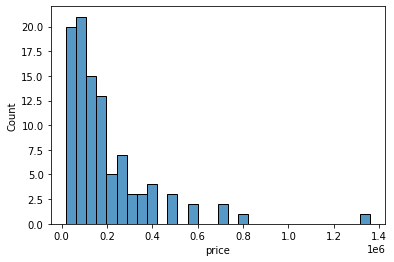

In [37]:
sns.histplot(data=df, x="price", bins = 30)

Veiem que caldria passarho a logaritme

In [42]:
df['logprice']=np.log(df['price'])

<AxesSubplot:xlabel='logprice', ylabel='Count'>

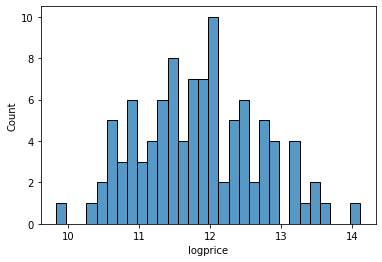

In [43]:
sns.histplot(data=df, x="logprice", bins = 30)

<AxesSubplot:xlabel='square_meters', ylabel='Count'>

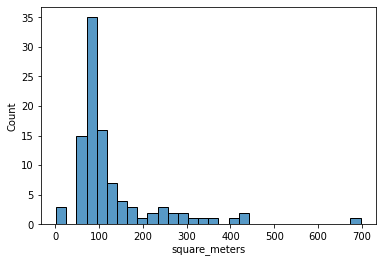

In [55]:
sns.histplot(data=df, x="square_meters", bins = 30)

Si apliquem el logaritme queda molt raro, no l'apliquem

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

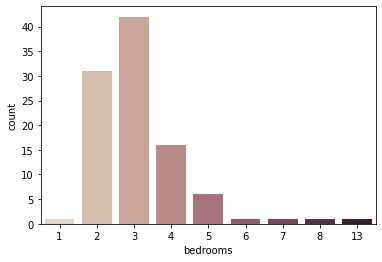

In [61]:
sns.countplot(x=df["bedrooms"],palette="ch:.25")

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

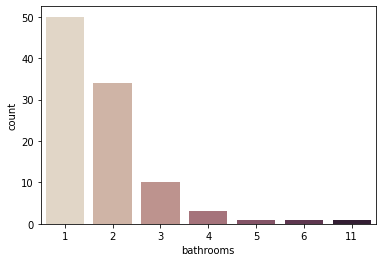

In [62]:
sns.countplot(x=df["bathrooms"],palette="ch:.25")

In [64]:
df.shape

(100, 134)

In [102]:
sub_df = df.iloc[:, 17:-2] #columnes amb unique features

In [73]:
sub_df.head()

,baseboard_radiator,central_ac,dishwasher,double_oven,microwave,oven,radiator,range_hood,range_oven,separate_washer__dryer,...,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view,logprice,logsquare_meters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11.951180,4.094345
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,12.546110,5.605802
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11.812289,4.465908
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,10.463103,4.025352
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12.886641,4.897840


In [103]:
sub_df.shape

(100, 115)

In [114]:
sub_df2 = sub_df.iloc[:, 50:]
sub_df3 = sub_df.iloc[:, :50]

In [117]:
sum_of_zeros_2 = sub_df2.eq(0).sum()
sum_of_ones_2 = sub_df2.eq(1).sum()
sum_of_zeros_3 = sub_df3.eq(0).sum()
sum_of_ones_3 = sub_df3.eq(1).sum()

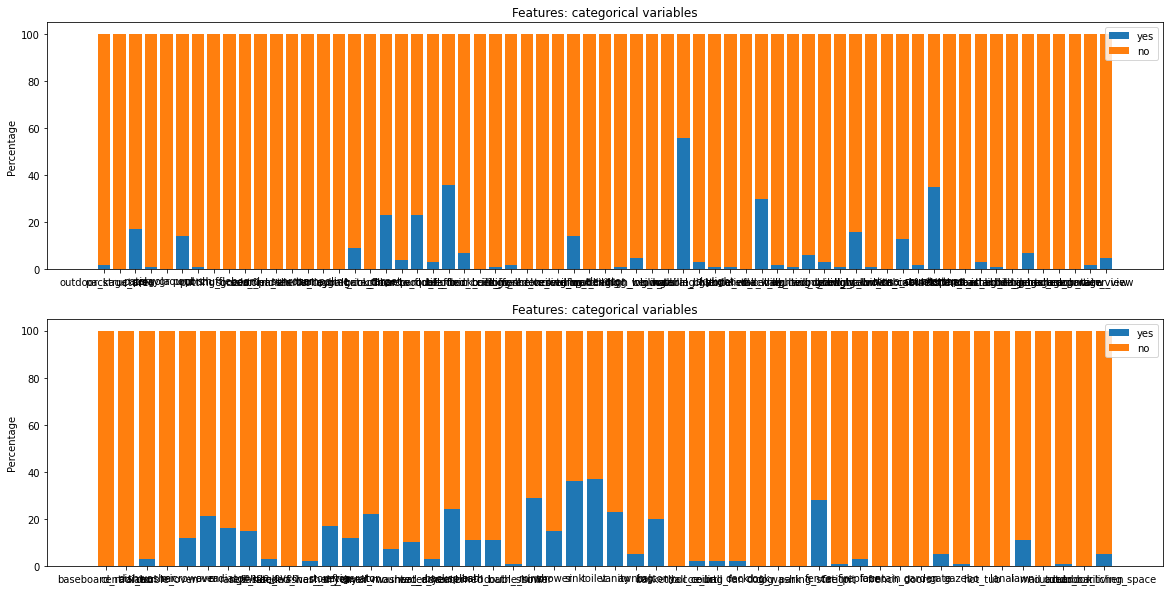

In [118]:

fig, ax = plt.subplots(2,1,figsize=(20, 10))

labels = sub_df2.columns
ax[0].bar(labels, sum_of_ones_2, label='yes')
ax[0].bar(labels,sum_of_zeros_2 , bottom= sum_of_ones_2,label='no')

ax[0].set_ylabel('Percentage')
ax[0].set_title('Features: categorical variables')
ax[0].legend()

labels = sub_df3.columns
ax[1].bar(labels, sum_of_ones_3, label='yes')
ax[1].bar(labels,sum_of_zeros_3 , bottom= sum_of_ones_3,label='no')

ax[1].set_ylabel('Percentage')
ax[1].set_title('Features: categorical variables')
ax[1].legend()


plt.show()

In [99]:
sub_df.columns

Index(['detached_carport', 'detached_garage', 'beach_view', 'mountain_view',
       'water_view'],
      dtype='object')

(1.0, 6.0)

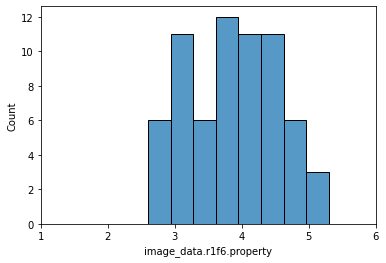

In [123]:
variable_without_nan = df['image_data.r1f6.property'].dropna()
sns.histplot(variable_without_nan)
plt.xlim(1,6)

(1.0, 6.0)

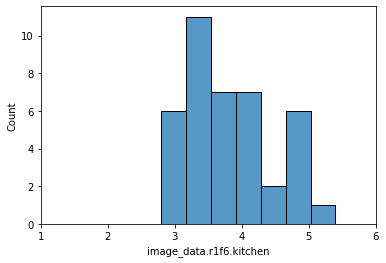

In [124]:
variable_without_nan = df['image_data.r1f6.kitchen'].dropna()
sns.histplot(variable_without_nan)
plt.xlim(1,6)

(1.0, 6.0)

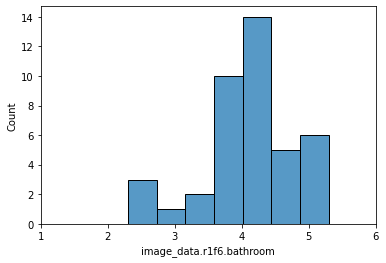

In [125]:
variable_without_nan = df['image_data.r1f6.bathroom'].dropna()
sns.histplot(variable_without_nan)
plt.xlim(1,6)

(1.0, 6.0)

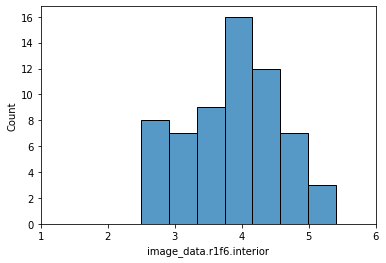

In [126]:
variable_without_nan = df['image_data.r1f6.interior'].dropna()
sns.histplot(variable_without_nan)
plt.xlim(1,6)

### df gran

In [1]:
df_gran = pd.read_csv("hackupc_total.csv")

NameError: name 'pd' is not defined

In [230]:
df_gran.head()

,Unnamed: 0,summary,city,neighborhood,region,price,square_meters,bedrooms,bathrooms,images,...,kitchen_island,pendant_lighting,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view
0,0,Casa en calle Urb. Las Mimosas,Ames,San Tome,a_coruna,250000.0,315.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,...,0,0,0,0,0,0,0,0,0,0
1,1,Piso en Milladoiro,Ames,San Tome,a_coruna,90000.0,72.0,2.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,...,0,0,0,0,0,0,0,0,0,0
2,2,Casa en calle La Piedra,A Ortigueira,Cariño,a_coruna,50000.0,92.0,2.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,...,0,0,0,0,0,0,0,0,0,0
3,3,Casa en Perillo,Perillo,Oleiros,a_coruna,359000.0,244.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,...,1,1,0,0,0,0,0,0,0,0
4,5,Casa en Bergondiño,Bergondo,Carrio,a_coruna,320000.0,226.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_gran['region'] = df_gran['region'].str.replace('_', ' ')
df_gran['region'] = df_gran['region'].str.replace('area de', '')
df_gran['region'] = df_gran['region'].str.replace(' almeriense', '')
df_gran['region'] = df_gran['region'].str.replace(' francesa', '')
df_gran['region'] = df_gran['region'].str.replace(' frances iparralde', '')

In [56]:
dict_regions = {}
regions = df_gran['region'].unique()
regions = [elemento + ' ' + 'españa' for elemento in regions]

In [42]:
from geopy.geocoders import Nominatim

In [43]:
geolocator = Nominatim(user_agent="geoapiExercises")


In [49]:
dict_reg = {}
for reg in regions:
    geolocator = Nominatim(user_agent="geoapiExercises")
    address=geolocator.geocode(reg)
    if (address == None):
            address = geolocator.geocode("Madrid")        
    dict_reg[reg] = (address.latitude, address.longitude)

In [57]:
# Python 3
import http.client, urllib.parse

In [58]:

key = 'ea496712811b1fd445af255c05357005'


In [59]:
conn = http.client.HTTPConnection('api.positionstack.com')

In [78]:
# Python 3
import http.client, urllib.parse
key = 'ea496712811b1fd445af255c05357005'
conn = http.client.HTTPConnection('api.positionstack.com')
dict_reg = {}
for reg in regions:
    params = urllib.parse.urlencode({
    'access_key': key,
    'query': reg,
    'limit': 1,
    })
    conn.request('GET', '/v1/forward?{}'.format(params))

    res = conn.getresponse()
    data = res.read()
    
    data_ok = json.loads(data.decode('utf-8'))
    
    print(reg)
    if (len(data_ok['data'])==0 or len(data_ok['data'][0])==0):
        print(reg)
    else:
        latitude = data_ok['data'][0]['latitude']
        longitude = data_ok['data'][0]['longitude']
        dict_reg[reg] = (latitude, longitude)

a coruna españa
alava araba españa
albacete españa
alicante españa
almeria españa
andorra andorra españa
asturias españa
avila españa
badajoz españa
barcelona españa
burgos españa
caceres españa
cadiz españa
cantabria españa
castellon castello españa
cerdanya españa
ceuta españa
ciudad real españa
cordoba españa
cuenca españa
girona españa
granada españa
guadalajara españa
guipuzcoa gipuzkoa españa
huelva españa
huesca españa
islas baleares illes balears españa
jaen españa
la rioja españa
las palmas españa
leon españa
lleida españa
lugo españa
madrid españa
malaga españa
melilla españa
murcia españa
navarra nafarroa españa
ourense españa
pais vasco españa
palencia españa
pontevedra españa
salamanca españa
santa cruz de tenerife españa
segovia españa
sevilla españa
soria españa
tarragona españa
teruel españa
toledo españa
valencia españa
valladolid españa
vizcaya bizkaia españa
zamora españa
zaragoza españa
 a coruna españa
 betanzos españa
 ferrol españa
arzua ordes terra de melide esp

In [77]:
data_ok['data']

[]

In [339]:
dict_reg

{'a coruna españa': (43.361148, -8.409827),
 'alava araba españa': (42.910532, -2.754306),
 'albacete españa': (38.995097, -1.86197),
 'alicante españa': (38.360892, -0.486281),
 'almeria españa': (36.844845, -2.456009),
 'andorra andorra españa': (40.979071, -0.448771),
 'asturias españa': (43.320572, -5.973707),
 'avila españa': (40.667503, -4.663682),
 'badajoz españa': (38.876618, -6.980327),
 'barcelona españa': (41.400347, 2.159592),
 'burgos españa': (42.343288, -3.693108),
 'caceres españa': (39.464967, -6.377459),
 'cadiz españa': (36.518753, -6.279529),
 'cantabria españa': (43.211454, -4.020572),
 'castellon castello españa': (40.409298, 0.012353),
 'cerdanya francesa españa': (40.09095, -3.464618),
 'ceuta españa': (35.889873, -5.327588),
 'ciudad real españa': (38.987396, -3.929308),
 'cordoba españa': (38.001032, -4.771112),
 'cuenca españa': (40.068426, -2.137),
 'girona españa': (41.97268, 2.818698),
 'granada españa': (37.182504, -3.601235),
 'guadalajara españa': (40.

In [333]:
dict_reg

{'a coruna españa': (43.361148, -8.409827),
 'alava araba españa': (42.910532, -2.754306),
 'albacete españa': (38.995097, -1.86197),
 'alicante españa': (38.360892, -0.486281),
 'almeria españa': (36.844845, -2.456009),
 'andorra andorra españa': (40.979071, -0.448771),
 'asturias españa': (43.320572, -5.973707),
 'avila españa': (40.667503, -4.663682),
 'badajoz españa': (38.876618, -6.980327),
 'barcelona españa': (41.400347, 2.159592),
 'burgos españa': (42.343288, -3.693108),
 'caceres españa': (39.464967, -6.377459),
 'cadiz españa': (36.518753, -6.279529),
 'cantabria españa': (43.211454, -4.020572),
 'castellon castello españa': (40.409298, 0.012353),
 'cerdanya francesa españa': (40.09095, -3.464618),
 'ceuta españa': (35.889873, -5.327588),
 'ciudad real españa': (38.987396, -3.929308),
 'cordoba españa': (38.001032, -4.771112),
 'cuenca españa': (40.068426, -2.137),
 'girona españa': (41.97268, 2.818698),
 'granada españa': (37.182504, -3.601235),
 'guadalajara españa': (40.

In [180]:
data_ok = json.loads(data.decode('utf-8'))

In [188]:
p = data_ok['data'][0]['latitude']

In [189]:
coord = (p,l)

In [191]:
coord[1]

-0.486281

In [51]:
import folium

In [79]:
import folium
mapa = folium.Map(location=[0, 0], zoom_start=2)

# Agregar marcadores en cada coordenada
for index, value in dict_reg.items():
    folium.Marker(value).add_to(mapa)

# Mostrar el mapa
mapa

In [80]:
dict_reg

{'a coruna españa': (43.361148, -8.409827),
 'alava araba españa': (42.910532, -2.754306),
 'albacete españa': (38.995097, -1.86197),
 'alicante españa': (38.360892, -0.486281),
 'almeria españa': (36.844845, -2.456009),
 'andorra andorra españa': (40.979071, -0.448771),
 'asturias españa': (43.320572, -5.973707),
 'avila españa': (40.667503, -4.663682),
 'badajoz españa': (38.876618, -6.980327),
 'barcelona españa': (41.400347, 2.159592),
 'burgos españa': (42.343288, -3.693108),
 'caceres españa': (39.464967, -6.377459),
 'cadiz españa': (36.518753, -6.279529),
 'cantabria españa': (43.211454, -4.020572),
 'castellon castello españa': (40.409298, 0.012353),
 'cerdanya españa': (40.09095, -3.464618),
 'ceuta españa': (35.889873, -5.327588),
 'ciudad real españa': (38.987396, -3.929308),
 'cordoba españa': (38.001032, -4.771112),
 'cuenca españa': (40.068426, -2.137),
 'girona españa': (41.97268, 2.818698),
 'granada españa': (37.182504, -3.601235),
 'guadalajara españa': (40.630579, -

In [98]:
import geopandas as geo
from shapely.geometry import Point

In [124]:
prov = geo.read_file('spain-provinces.json')
prov


,cod_prov,name,cod_ccaa,cartodb_id,created_at,updated_at,geometry
0,07,Illes Balears,03,7,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((3.21365 39.95751, 3.15440 39.9..."
1,33,Asturias,18,33,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-5.84083 43.66062, -5.83002 43..."
2,15,A Coruña,11,15,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-7.68030 43.78714, -7.66231 43..."
3,17,Girona,08,17,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((1.74871 42.49482, 1.82355 42.4..."
4,35,Las Palmas,04,35,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-13.89051 28.75685, -13.83632 ..."
5,36,Pontevedra,11,36,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-8.18101 42.85828, -8.11637 42..."
6,38,Santa Cruz De Tenerife,04,38,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-16.15754 28.58816, -16.12669 ..."
7,39,Cantabria,05,39,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-3.59024 43.51356, -3.54634 43..."
8,29,Málaga,01,29,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-4.40658 37.27412, -4.37894 37..."
9,04,Almería,01,4,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-2.18191 37.89882, -2.17201 37..."


In [104]:
prov = prov.to_crs('EPSG:4326')

In [101]:
prov[prov['name']=='Barcelona']

,cod_prov,name,cod_ccaa,cartodb_id,created_at,updated_at,geometry
17,08,Barcelona,08,8,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((1.91821 42.31778, 2.06990 42.2..."


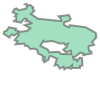

In [123]:
prov['geometry'][13]

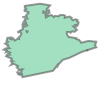

In [107]:
prov['geometry'].iloc[17]

In [108]:
prov['geometry'].contains(Point(2.16897, 41.630059,))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [134]:
dict_reg_prov = {}
for index, coord in dict_reg.items():
    prov_enc = prov['geometry'].contains(Point(coord[1], coord[0]))
                    
    if prov_enc.empty:
        dict_reg_prov[index]=-1
    else:
        for i in range (len(prov_enc)):
            if(prov_enc[i]== True):
                dict_reg_prov[index]=i

In [135]:
dict_reg_prov
    

{'a coruna españa': 2,
 'alava araba españa': 13,
 'albacete españa': 11,
 'alicante españa': 15,
 'almeria españa': 9,
 'andorra andorra españa': 45,
 'asturias españa': 1,
 'avila españa': 12,
 'badajoz españa': 14,
 'barcelona españa': 17,
 'burgos españa': 18,
 'caceres españa': 19,
 'cadiz españa': 20,
 'cantabria españa': 7,
 'castellon castello españa': 21,
 'cerdanya españa': 38,
 'ceuta españa': 36,
 'ciudad real españa': 22,
 'cordoba españa': 24,
 'cuenca españa': 25,
 'girona españa': 3,
 'granada españa': 26,
 'guadalajara españa': 27,
 'guipuzcoa gipuzkoa españa': 28,
 'huelva españa': 29,
 'huesca españa': 30,
 'islas baleares illes balears españa': 0,
 'jaen españa': 23,
 'la rioja españa': 33,
 'las palmas españa': 4,
 'leon españa': 31,
 'lleida españa': 32,
 'lugo españa': 37,
 'madrid españa': 38,
 'malaga españa': 8,
 'melilla españa': 51,
 'murcia españa': 10,
 'ourense españa': 16,
 'pais vasco españa': 13,
 'palencia españa': 39,
 'pontevedra españa': 5,
 'salam

### FUSIONAR EN UN DATAFRAME

In [163]:
df_t = pd.read_csv('hackupc_total_treated.csv')

In [137]:
df_t.head()

,Unnamed: 0,property_id,summary,region,price,square_meters,bedrooms,bathrooms,images,num_images,...,pendant_lighting,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view,logprice
0,0,0,Casa en calle Urb. Las Mimosas,a_coruna,250000.0,315.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,31,...,0,0,0,0,0,0,0,0,0,12.429216
1,1,1,Piso en Milladoiro,a_coruna,90000.0,72.0,2.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,11,...,0,0,0,0,0,0,0,0,0,11.407565
2,2,3,Casa en Perillo,a_coruna,359000.0,244.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,38,...,1,0,0,0,0,0,0,0,0,12.791078
3,3,5,Casa en Bergondiño,a_coruna,320000.0,226.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,21,...,0,0,0,0,0,0,0,0,0,12.676076
4,4,7,Apartamento en Cuatro Caminos,a_coruna,102000.0,48.0,1.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,10,...,0,0,0,0,0,0,0,0,0,11.532728


In [164]:
df_t['region'] = df_t['region'].str.replace('_', ' ')
df_t['region'] = df_t['region'].str.replace('area de', '')
df_t['region'] = df_t['region'].str.replace(' almeriense', '')
df_t['region'] = df_t['region'].str.replace(' francesa', '')
df_t['region'] = df_t['region'].str.replace(' frances iparralde', '')


In [165]:
df_t['region'] = df_t['region'].apply(lambda x: x + ' españa')

In [ ]:
dict_regions = {}
regions = df_t['region'].unique()

In [ ]:
# Python 3
import http.client, urllib.parse
key = 'ea496712811b1fd445af255c05357005'
conn = http.client.HTTPConnection('api.positionstack.com')
dict_reg = {}
for reg in regions:
    params = urllib.parse.urlencode({
    'access_key': key,
    'query': reg,
    'limit': 1,
    })
    conn.request('GET', '/v1/forward?{}'.format(params))

    res = conn.getresponse()
    data = res.read()
    
    data_ok = json.loads(data.decode('utf-8'))
    
    print(reg)
    if (len(data_ok['data'])==0 or len(data_ok['data'][0])==0):
        print(reg)
    else:
        latitude = data_ok['data'][0]['latitude']
        longitude = data_ok['data'][0]['longitude']
        dict_reg[reg] = (latitude, longitude)

In [ ]:
import folium
mapa = folium.Map(location=[0, 0], zoom_start=2)

# Agregar marcadores en cada coordenada
for index, value in dict_reg.items():
    folium.Marker(value).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
import geopandas as geo
from shapely.geometry import Point
prov = geo.read_file('spain-provinces.json')
prov
prov = prov.to_crs('EPSG:4326')
dict_reg_prov = {}
for index, coord in dict_reg.items():
    prov_enc = prov['geometry'].contains(Point(coord[1], coord[0]))
                    
    if prov_enc.empty:
        dict_reg_prov[index]=-1
    else:
        for i in range (len(prov_enc)):
            if(prov_enc[i]== True):
                dict_reg_prov[index]=i

In [141]:
df_t['id_prov'] = -1

In [153]:
df_t_20 = df_t.head(20)

In [167]:
i = 0;
for index, row in df_t.iterrows():
    i = i+1;
    if (i%1000 == 0):
        print(i)
    if (row['region'] in dict_reg_prov):
        df_t.at[index, 'id_prov'] = dict_reg_prov[row['region']]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [172]:
df_t[df_t['id_prov']==17]

,Unnamed: 0,property_id,summary,region,price,square_meters,bedrooms,bathrooms,images,num_images,...,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view,logprice,id_prov
12228,12228,20992,"Piso en Carrer de les Orenetes, 37",barcelona españa,149900.0,57.0,2.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,1,...,0,0,0,0,0,0,0,0,11.917724,17.0
12229,12229,20994,Piso en Centre-Zona Estació-Passeig de Joan Ma...,barcelona españa,297000.0,112.0,3.0,2.0,['https://restb-hackathon.s3.amazonaws.com/rea...,29,...,0,0,0,0,0,0,0,0,12.601487,17.0
12230,12230,20996,Piso en Can Tintorer-Can Tries,barcelona españa,166000.0,78.0,3.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,19,...,0,0,0,0,0,0,0,0,12.019743,17.0
12231,12231,20997,Casa en Carrer Barcelona,barcelona españa,130000.0,184.0,4.0,2.0,['https://restb-hackathon.s3.amazonaws.com/rea...,1,...,0,0,0,0,0,0,0,0,11.775290,17.0
12232,12232,20999,Piso en Cerca de La Novartis,barcelona españa,150000.0,81.0,3.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,1,...,0,0,0,0,0,0,0,0,11.918391,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434893,434893,825768,Casa en Vilanova del Vallès,vilanova del valles españa,375000.0,239.0,3.0,2.0,['https://restb-hackathon.s3.amazonaws.com/rea...,20,...,0,0,0,0,0,0,0,0,12.834681,17.0
434894,434894,825769,Chalet en Vilanova del Vallès,vilanova del valles españa,324100.0,133.0,4.0,2.0,['https://restb-hackathon.s3.amazonaws.com/rea...,8,...,0,0,0,0,0,0,0,0,12.688807,17.0
434895,434895,825770,Chalet en Vilanova del Vallès,vilanova del valles españa,292800.0,227.0,4.0,2.0,['https://restb-hackathon.s3.amazonaws.com/rea...,14,...,0,1,0,0,0,0,0,0,12.587245,17.0
434896,434896,825771,Piso en Vilanova del Vallès,vilanova del valles españa,320400.0,226.0,4.0,2.0,['https://restb-hackathon.s3.amazonaws.com/rea...,14,...,0,0,1,0,0,0,0,0,12.677325,17.0


In [173]:
df_t.to_csv('hackupc_provincies.csv')

In [161]:
df_t_20.head()

,Unnamed: 0,property_id,summary,region,price,square_meters,bedrooms,bathrooms,images,num_images,...,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view,logprice,id_prov
0,0,0,Casa en calle Urb. Las Mimosas,a coruna españa,250000.0,315.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,31,...,0,0,0,0,0,0,0,0,12.429216,2
1,1,1,Piso en Milladoiro,a coruna españa,90000.0,72.0,2.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,11,...,0,0,0,0,0,0,0,0,11.407565,2
2,2,3,Casa en Perillo,a coruna españa,359000.0,244.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,38,...,0,0,0,0,0,0,0,0,12.791078,2
3,3,5,Casa en Bergondiño,a coruna españa,320000.0,226.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,21,...,0,0,0,0,0,0,0,0,12.676076,2
4,4,7,Apartamento en Cuatro Caminos,a coruna españa,102000.0,48.0,1.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,10,...,0,0,0,0,0,0,0,0,11.532728,2


In [146]:
dict_reg_prov['navarra nafarroa españa']

KeyError: 'navarra nafarroa españa'

In [147]:
dict_reg_prov

{'a coruna españa': 2,
 'alava araba españa': 13,
 'albacete españa': 11,
 'alicante españa': 15,
 'almeria españa': 9,
 'andorra andorra españa': 45,
 'asturias españa': 1,
 'avila españa': 12,
 'badajoz españa': 14,
 'barcelona españa': 17,
 'burgos españa': 18,
 'caceres españa': 19,
 'cadiz españa': 20,
 'cantabria españa': 7,
 'castellon castello españa': 21,
 'cerdanya españa': 38,
 'ceuta españa': 36,
 'ciudad real españa': 22,
 'cordoba españa': 24,
 'cuenca españa': 25,
 'girona españa': 3,
 'granada españa': 26,
 'guadalajara españa': 27,
 'guipuzcoa gipuzkoa españa': 28,
 'huelva españa': 29,
 'huesca españa': 30,
 'islas baleares illes balears españa': 0,
 'jaen españa': 23,
 'la rioja españa': 33,
 'las palmas españa': 4,
 'leon españa': 31,
 'lleida españa': 32,
 'lugo españa': 37,
 'madrid españa': 38,
 'malaga españa': 8,
 'melilla españa': 51,
 'murcia españa': 10,
 'ourense españa': 16,
 'pais vasco españa': 13,
 'palencia españa': 39,
 'pontevedra españa': 5,
 'salam

### graficito

In [178]:
df_t
df_t_ok.head()

,Unnamed: 0,property_id,summary,region,price,square_meters,bedrooms,bathrooms,images,num_images,...,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view,logprice,id_prov
0,0,0,Casa en calle Urb. Las Mimosas,a coruna españa,250000.0,315.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,31,...,0,0,0,0,0,0,0,0,12.429216,2.0
1,1,1,Piso en Milladoiro,a coruna españa,90000.0,72.0,2.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,11,...,0,0,0,0,0,0,0,0,11.407565,2.0
2,2,3,Casa en Perillo,a coruna españa,359000.0,244.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,38,...,0,0,0,0,0,0,0,0,12.791078,2.0
3,3,5,Casa en Bergondiño,a coruna españa,320000.0,226.0,4.0,3.0,['https://restb-hackathon.s3.amazonaws.com/rea...,21,...,0,0,0,0,0,0,0,0,12.676076,2.0
4,4,7,Apartamento en Cuatro Caminos,a coruna españa,102000.0,48.0,1.0,1.0,['https://restb-hackathon.s3.amazonaws.com/rea...,10,...,0,0,0,0,0,0,0,0,11.532728,2.0


In [184]:
prov = geo.read_file('spain-provinces.json')
prov

,cod_prov,name,cod_ccaa,cartodb_id,created_at,updated_at,geometry
0,07,Illes Balears,03,7,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((3.21365 39.95751, 3.15440 39.9..."
1,33,Asturias,18,33,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-5.84083 43.66062, -5.83002 43..."
2,15,A Coruña,11,15,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-7.68030 43.78714, -7.66231 43..."
3,17,Girona,08,17,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((1.74871 42.49482, 1.82355 42.4..."
4,35,Las Palmas,04,35,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-13.89051 28.75685, -13.83632 ..."
5,36,Pontevedra,11,36,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-8.18101 42.85828, -8.11637 42..."
6,38,Santa Cruz De Tenerife,04,38,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-16.15754 28.58816, -16.12669 ..."
7,39,Cantabria,05,39,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-3.59024 43.51356, -3.54634 43..."
8,29,Málaga,01,29,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-4.40658 37.27412, -4.37894 37..."
9,04,Almería,01,4,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-2.18191 37.89882, -2.17201 37..."


In [188]:
prov['mean_price'] = df_t_ok.groupby('id_prov')['price'].mean()

In [189]:
prov

,cod_prov,name,cod_ccaa,cartodb_id,created_at,updated_at,geometry,mean_price
0,07,Illes Balears,03,7,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((3.21365 39.95751, 3.15440 39.9...",663501.559410
1,33,Asturias,18,33,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-5.84083 43.66062, -5.83002 43...",176720.634795
2,15,A Coruña,11,15,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-7.68030 43.78714, -7.66231 43...",175538.123203
3,17,Girona,08,17,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((1.74871 42.49482, 1.82355 42.4...",319787.487553
4,35,Las Palmas,04,35,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-13.89051 28.75685, -13.83632 ...",236156.251032
5,36,Pontevedra,11,36,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-8.18101 42.85828, -8.11637 42...",227901.851608
6,38,Santa Cruz De Tenerife,04,38,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-16.15754 28.58816, -16.12669 ...",284270.596126
7,39,Cantabria,05,39,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-3.59024 43.51356, -3.54634 43...",179840.265306
8,29,Málaga,01,29,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-4.40658 37.27412, -4.37894 37...",396940.118539
9,04,Almería,01,4,2014-09-30T00:00:00+00:00,2014-12-25T01:56:10+00:00,"MULTIPOLYGON (((-2.18191 37.89882, -2.17201 37...",122352.262738


<AxesSubplot:>

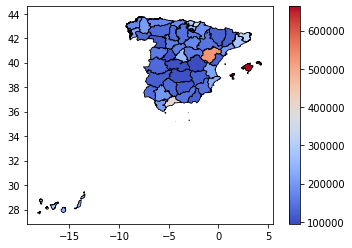

In [190]:
prov.plot(column='mean_price', cmap='coolwarm', linewidth=0.8, edgecolor='black', legend=True)

In [ ]:
m = folium.Map(location=[latitude, longitude], zoom_start=zoom)

# Create the choropleth layer
folium.Choropleth(
    geo_data=geojson_map,
    data=value_data,
    columns=['region_id', 'value'],
    key_on='feature.properties.region_id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value'
).add_to(m)